In [1]:
print("hello, world!")

hello, world!


In [2]:
import pandas as pd
import os

def load_data(path):
    return pd.read_csv(path)

In [3]:
taxi = load_data('data/train.csv')

In [4]:
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


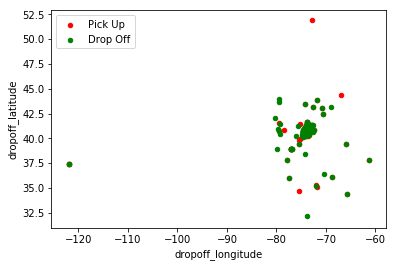

In [12]:
%matplotlib inline
ax1 = taxi.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", color='r', label="Pick Up")
taxi.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude", color='g', ax=ax1, label="Drop Off")

In [13]:
# copy the data so we don't mess the original
taxi_cleaned = taxi.copy()

In [14]:
taxi_attrs = taxi.drop('trip_duration', axis=1)
taxi_labels = taxi['trip_duration'].copy()

In [15]:
taxi_attrs.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [16]:
for attr in ['id', 'store_and_fwd_flag']:
    taxi_attrs.drop(attr, axis=1)
    

In [17]:
taxi_attrs.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [18]:
taxi_attrs = taxi_attrs.drop('id', axis=1)
taxi_attrs = taxi_attrs.drop('store_and_fwd_flag', axis=1)

In [19]:
taxi_attrs.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520


In [20]:
taxi_attrs = taxi.drop('trip_duration', axis=1)

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [24]:
selector = DataFrameSelector(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
locations = selector.transform(taxi_attrs)

In [27]:
locations[:, :2]

array([[-73.98215485,  40.76793671],
       [-73.98041534,  40.73856354],
       [-73.97902679,  40.7639389 ],
       ..., 
       [-73.95912933,  40.76879883],
       [-73.98207855,  40.74906158],
       [-73.97953796,  40.78174973]])

In [28]:
import numpy as np

np.linalg.norm(locations[:, :2] - locations[:, 2:])

70.132953992820603

In [29]:
locations[:, :2] - locations[:, 2:]

array([[-0.01752472,  0.00233459],
       [ 0.01906586,  0.00741196],
       [ 0.02630615,  0.05385208],
       ..., 
       [ 0.04530334,  0.06142807],
       [-0.00744629, -0.0080452 ],
       [-0.00672913, -0.00883484]])

In [30]:
locations

array([[-73.98215485,  40.76793671, -73.96463013,  40.76560211],
       [-73.98041534,  40.73856354, -73.9994812 ,  40.73115158],
       [-73.97902679,  40.7639389 , -74.00533295,  40.71008682],
       ..., 
       [-73.95912933,  40.76879883, -74.00443268,  40.70737076],
       [-73.98207855,  40.74906158, -73.97463226,  40.75710678],
       [-73.97953796,  40.78174973, -73.97280884,  40.79058456]])

In [31]:
for location in locations:
    np.linalg.norm(locations[:2] - locations[2:])

ValueError: operands could not be broadcast together with shapes (2,4) (1458642,4) 

In [38]:
np.sqrt(np.square(locations[:, 2] - locations[:, 0]) + np.square(locations[:,3] - locations[:, 1]))

array([ 0.01767954,  0.0204559 ,  0.0599338 , ...,  0.07632693,
        0.01096232,  0.01110565])

In [5]:
from data_cleaning import DataFrameSelector, DistanceAdder
import pandas as pd

taxi = pd.read_csv('data/train.csv')
taxi_attrs = taxi.drop('trip_duration', axis=1)

selector = DataFrameSelector(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
locations = selector.transform(taxi_attrs)

dist_adder = DistanceAdder(add_distance=True)
dist_adder.transform(locations)[:5,:]

array([[ -7.39821548e+01,   4.07679367e+01,  -7.39646301e+01,
          4.07656021e+01,   1.76795395e-02],
       [ -7.39804153e+01,   4.07385635e+01,  -7.39994812e+01,
          4.07311516e+01,   2.04559039e-02],
       [ -7.39790268e+01,   4.07639389e+01,  -7.40053329e+01,
          4.07100868e+01,   5.99337994e-02],
       [ -7.40100403e+01,   4.07199707e+01,  -7.40122681e+01,
          4.07067184e+01,   1.34382055e-02],
       [ -7.39730530e+01,   4.07932091e+01,  -7.39729233e+01,
          4.07825203e+01,   1.06895686e-02]])

In [6]:
import data_cleaning

In [7]:
data_cleaning.pipeline

AttributeError: module 'data_cleaning' has no attribute 'pipeline'

In [8]:
from data_cleaning import DataCleaning

ImportError: cannot import name 'DataCleaning'

In [9]:
import data_cleaning

data_cleaning.pipeline

AttributeError: module 'data_cleaning' has no attribute 'pipeline'

In [1]:
import data_cleaning
import pandas as pd

taxi = pd.read_csv('data/train.csv')
taxi_prepared = data_cleaning.pipeline.fit_transform(taxi)

In [2]:
taxi_labels = taxi['trip_duration'].copy()
taxi_labels

0           455
1           663
2          2124
3           429
4           435
5           443
6           341
7          1551
8           255
9          1225
10         1274
11         1128
12         1114
13          260
14         1414
15          211
16         2316
17          731
18         1317
19          251
20          486
21          652
22          423
23         1163
24         2485
25         1283
26         1130
27          694
28          892
29         2331
           ... 
1458614     338
1458615     857
1458616     488
1458617     208
1458618     367
1458619     708
1458620    1162
1458621    2355
1458622     552
1458623     554
1458624     152
1458625    2002
1458626     244
1458627     880
1458628     351
1458629     601
1458630     549
1458631     342
1458632     777
1458633     979
1458634     972
1458635     237
1458636     800
1458637     760
1458638     414
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Len

In [3]:
from sklearn.linear_model import LinearRegression
line_reg = LinearRegression()
line_reg.fit(taxi_prepared, taxi_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
some_data = taxi.iloc[:5]
some_labels = taxi_labels.iloc[:5]
some_data_prepared = data_cleaning.pipeline.transform(some_data)
print("Predictions: ", line_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [  747.53698907   818.54631329  1219.72882188   779.14952822   631.20473284]
Labels:  [455, 663, 2124, 429, 435]
